# TMBD Movie Data Analysis

## Table of Contents

<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
    
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
The TMDB is a CSV file that contains over 10,000 records and 21 dimensions of varied data types.
<br>
Listed below are the columns and description with respective data types;

<br>
    * id : identification number - Integer
<br>
    * imdb_id: internet movie database identification number - String
<br>
    * popularity: popularity  - Float
<br>
    * budget: estimated amount to be spent - Integer
<br>
    * revenue: amount generated - Integer
<br>
    * original_title: movie title - String 
<br>
    * cast: character's name - String
<br>
    * homepage: link to watch movie - String
<br>
    * director: movie director - String
<br>
    * tagline: short text which serves to clarify an movie idea - String
<br>
    * keywords: word that are significant in movie - String
<br>
    * overview: movie summary - String
<br>
    * runtime: lenght of the movie - String
<br>
    * genres: movie genre - String
<br>
    * production_companies: companies that producted the movie  - String 
<br>
    * release_date: movie release date  - String
<br>
    * vote_count: vote counts -Integer
<br>
    * vote_average: average vote - Float
<br>
    * release_year: movie release year -Integer
<br>
    * budget_adj: budget of the associated movie in terms of 2010 dollars, accounting for inflation over time. - Float
<br>
    * revenue_ad: revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time. - Float
<br>

### Questions for Analysis
My analysis will be based on answering the below questions;

    1. What are the 5 most popular genre?
    2. What are the 10 Highest grossing movies?
    3. Who are the most featured actors?
    4. What the top 10 most profitable movie?
    5. What is the sum of profit per year, most profitable year and the least profitable year?
    6. What is the average rating per director?
    7. What is the average rating per year?
    8. What are the most popular movies?
    9. What is the number of movies per year?


#### Importing Python libraries

In [1]:
#import libaries and a 'magic word'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.ticker as mticker

<a id='wrangling'></a>
## Data Wrangling

### General Properties

### Load dataset using read_csv() and check dataset properties

In [2]:
#load data
df = pd.read_csv('tmdb-movies.csv')
pd.set_option('display.float_format', lambda x: '%.9f' % x)

In [3]:
#check number of rows and columns()
df.shape

(10866, 21)

In [4]:
#check top rows of the data
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763000,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,06/09/2015,5562,6.500000000,2015,137999939.300000012,1392445893.000000000
1,76341,tt1392190,28.419936000,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.100000000,2015,137999939.300000012,348161292.500000000
2,262500,tt2908446,13.112507000,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.300000000,2015,101199955.500000000,271619025.399999976
3,140607,tt2488496,11.173104000,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.500000000,2015,183999919.000000000,1902723130.000000000
4,168259,tt2820852,9.335014000,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,04/01/2015,2947,7.300000000,2015,174799923.099999994,1385748801.000000000


In [5]:
#check data characteristics
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [6]:
#check data description
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000000,10866.000000000,10866.000000000,10866.000000000,10866.000000000,10866.000000000,10866.000000000,10866.000000000,10866.000000000,10866.000000000
mean,66064.177434198,0.646440952,14625701.094146879,39823319.793392234,102.070863243,217.389747837,5.974921774,2001.322657832,17551039.822900452,51364363.253164716
std,92130.136560955,1.000184934,30913213.831436194,117003486.582089067,31.381405082,575.619057732,0.935141815,12.812940571,34306155.722930893,144632485.037723243
min,5.000000000,0.000065000,0.000000000,0.000000000,0.000000000,10.000000000,1.500000000,1960.000000000,0.000000000,0.000000000
25%,10596.250000000,0.207582750,0.000000000,0.000000000,90.000000000,17.000000000,5.400000000,1995.000000000,0.000000000,0.000000000
50%,20669.000000000,0.383855500,0.000000000,0.000000000,99.000000000,38.000000000,6.000000000,2006.000000000,0.000000000,0.000000000
75%,75610.000000000,0.713817000,15000000.000000000,24000000.000000000,111.000000000,145.750000000,6.600000000,2011.000000000,20853251.079999998,33697095.717500001
max,417859.000000000,32.985763000,425000000.000000000,2781505847.000000000,900.000000000,9767.000000000,9.200000000,2015.000000000,425000000.000000000,2827123750.000000000


In [7]:
#check datatypes
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [8]:
#check for null values
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [9]:
#check for duplicates
df.duplicated().sum()

1

### Data Cleaning

After assessing the data, i realized that there are missing values in cast, homepage, director, tagline, keywords, overview, runtime, genres, production_companies, duplicate row and columns not needed for the analysis.

I will be do the below listed procedures to clean the data
    * drop columns that are specific to movies and won't be needed in the analysis
    * drop null values
    * drop duplicates
    * change all columns with float data type to one decimal place
    * rename columns whose names are not explanatory enough 
    * create new coulumn

#### Drop columns

In [10]:
#drop columns not needed
columns_to_remove = ['id', 'imdb_id', 'homepage', 'tagline', 'keywords', 'overview', 'release_date', 'production_companies', 'budget_adj','revenue_adj']
df.drop(columns_to_remove, axis =1, inplace=True)

In [11]:
#confirm columns have been removed
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year
0,32.985763000,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.500000000,2015
1,28.419936000,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,6185,7.100000000,2015
2,13.112507000,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2480,6.300000000,2015
3,11.173104000,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,5292,7.500000000,2015
4,9.335014000,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2947,7.300000000,2015


#### Remove null values

In [12]:
#drop null values
df.dropna(inplace =True)

In [13]:
#comfirm all null values are dropped
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10732 entries, 0 to 10865
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10732 non-null  float64
 1   budget          10732 non-null  int64  
 2   revenue         10732 non-null  int64  
 3   original_title  10732 non-null  object 
 4   cast            10732 non-null  object 
 5   director        10732 non-null  object 
 6   runtime         10732 non-null  int64  
 7   genres          10732 non-null  object 
 8   vote_count      10732 non-null  int64  
 9   vote_average    10732 non-null  float64
 10  release_year    10732 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 1006.1+ KB


#### Remove duplicates

In [14]:
#drop duplicates
df.drop_duplicates(inplace=True)

In [15]:
#confirm duplicates are dropped
df.duplicated().sum()

0

#### Change float columns to one decimal place

In [16]:
#change all float columns to one decimal place
pd.options.display.float_format = '{:.1f}'.format

In [17]:
#check decimal place change
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year
0,33.0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015
1,28.4,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015
2,13.1,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2480,6.3,2015
3,11.2,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015
4,9.3,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2947,7.3,2015


#### Rename Columns

In [18]:
#rename columns
df.rename(columns ={'vote_average' : 'rating','original_title':'movie_title'},inplace=True)

In [19]:
#check columns new names
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10731 entries, 0 to 10865
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   popularity    10731 non-null  float64
 1   budget        10731 non-null  int64  
 2   revenue       10731 non-null  int64  
 3   movie_title   10731 non-null  object 
 4   cast          10731 non-null  object 
 5   director      10731 non-null  object 
 6   runtime       10731 non-null  int64  
 7   genres        10731 non-null  object 
 8   vote_count    10731 non-null  int64  
 9   rating        10731 non-null  float64
 10  release_year  10731 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 1006.0+ KB


#### Create new column

In [20]:
#create new column for profit
df['profit'] = df['revenue'] - df['budget']

In [21]:
#check updated columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10731 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   popularity    10731 non-null  float64
 1   budget        10731 non-null  int64  
 2   revenue       10731 non-null  int64  
 3   movie_title   10731 non-null  object 
 4   cast          10731 non-null  object 
 5   director      10731 non-null  object 
 6   runtime       10731 non-null  int64  
 7   genres        10731 non-null  object 
 8   vote_count    10731 non-null  int64  
 9   rating        10731 non-null  float64
 10  release_year  10731 non-null  int64  
 11  profit        10731 non-null  int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 1.1+ MB


<a id='eda'></a>
## Exploratory Data Analysis

### Explore the dataset

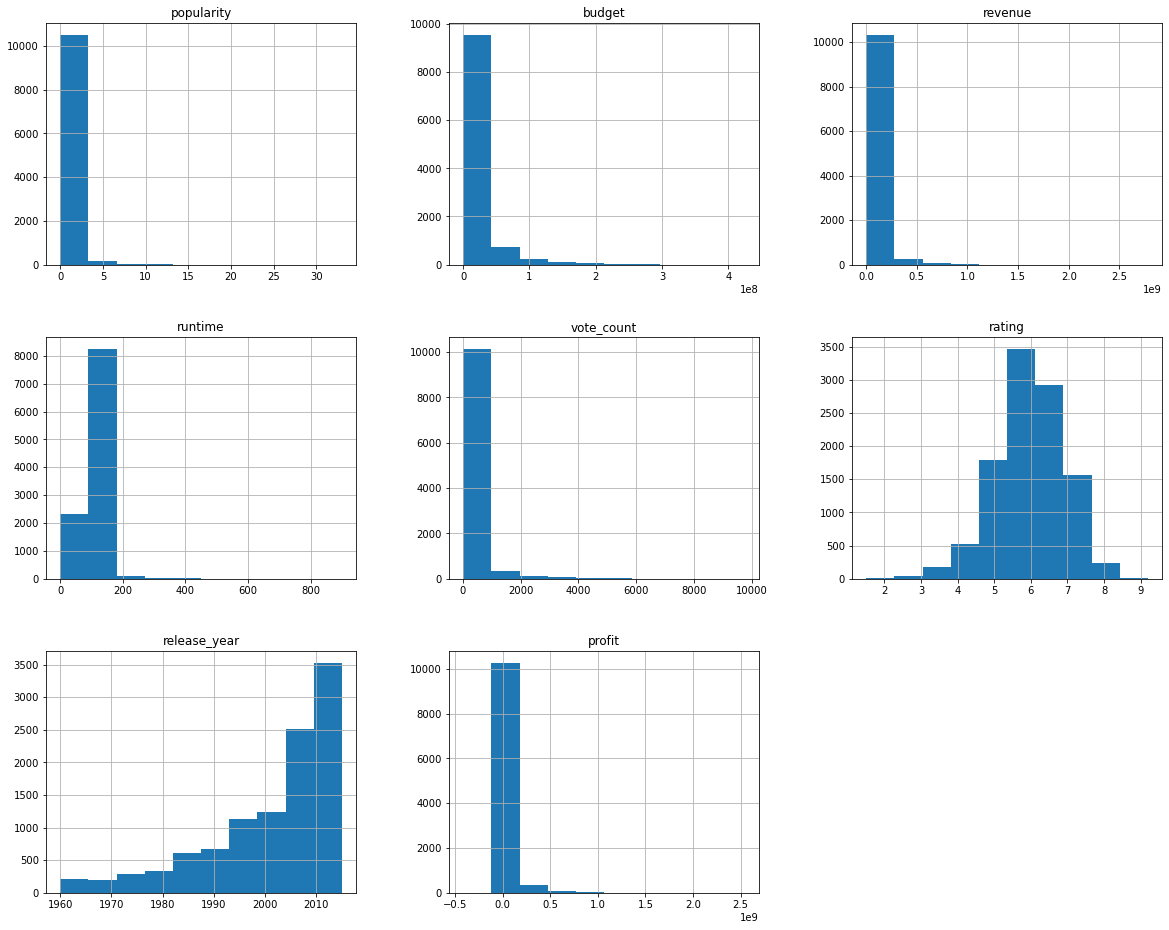

In [22]:
#Explore the dataset
df.hist(figsize=(20,16));

### Correlation Analysis

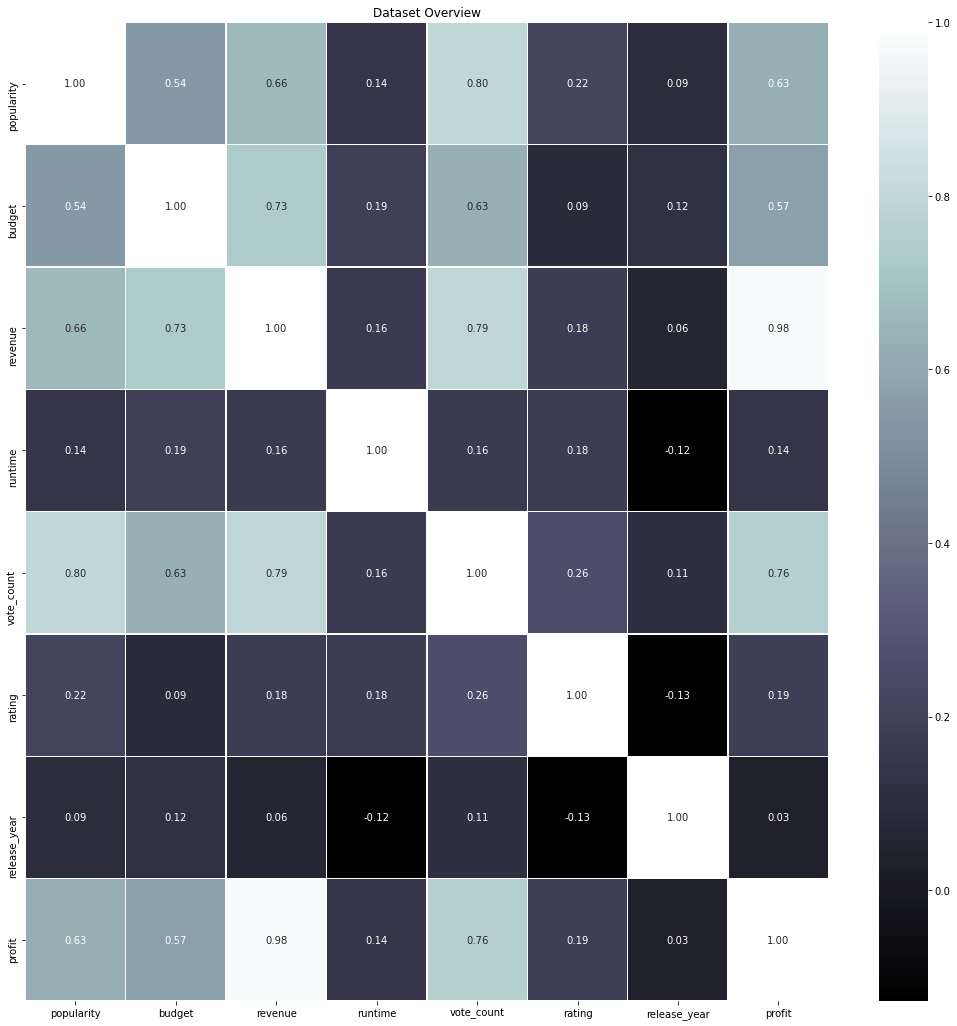

,popularity,budget,revenue,runtime,vote_count,rating,release_year,profit
popularity,1.0,0.5,0.7,0.1,0.8,0.2,0.1,0.6
budget,0.5,1.0,0.7,0.2,0.6,0.1,0.1,0.6
revenue,0.7,0.7,1.0,0.2,0.8,0.2,0.1,1.0
runtime,0.1,0.2,0.2,1.0,0.2,0.2,-0.1,0.1
vote_count,0.8,0.6,0.8,0.2,1.0,0.3,0.1,0.8
rating,0.2,0.1,0.2,0.2,0.3,1.0,-0.1,0.2
release_year,0.1,0.1,0.1,-0.1,0.1,-0.1,1.0,0.0
profit,0.6,0.6,1.0,0.1,0.8,0.2,0.0,1.0


In [23]:
#Get overview of dataset
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df.corr(), cmap = 'bone', annot=True, linewidths=.5, fmt= '.2f',ax=ax);
plt.title('Dataset Overview');
plt.show()
df.corr()

#### Create a function to invoke whenever I want to plot that a scatter plot

In [24]:
def scatterplot(x_data, y_data, x_label="", y_label="", title="", color = "r"):
    _, ax = plt.subplots()
    ax.scatter(x_data, y_data, s = 30, color = color)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

#### Relationship between popularity and rating

,popularity,rating
popularity,1.0,0.2
rating,0.2,1.0


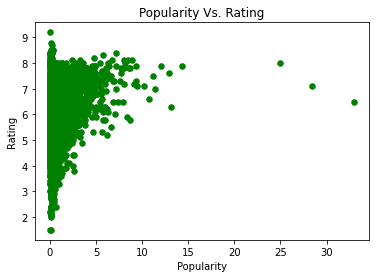

In [25]:
scatterplot(df['popularity'],df['rating'],'Popularity','Rating','Popularity Vs. Rating', 'green')
df[['popularity', 'rating']].corr()

Positive relationship: Pearson r = 0.2

#### Relationship between rating and revenue_generated

,rating,revenue
rating,1.0,0.2
revenue,0.2,1.0


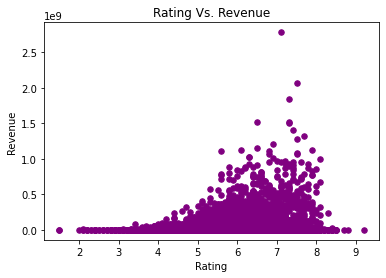

In [26]:
scatterplot(df['rating'],df['revenue'],'Rating','Revenue','Rating Vs. Revenue', 'purple')
df[['rating', 'revenue']].corr()

Positive relationship: Pearson r = 0.2

#### Relationship between budget and revenue_generated

,budget,revenue
budget,1.0,0.7
revenue,0.7,1.0


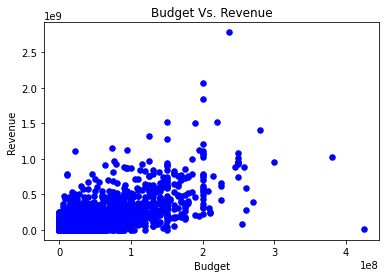

In [27]:
scatterplot(df['budget'],df['revenue'],'Budget','Revenue','Budget Vs. Revenue', 'blue')
df[['budget', 'revenue']].corr()

Largely positive relationship: Pearson r = 0.7

#### Relationship between popularity and production_cost

,popularity,budget
popularity,1.0,0.5
budget,0.5,1.0


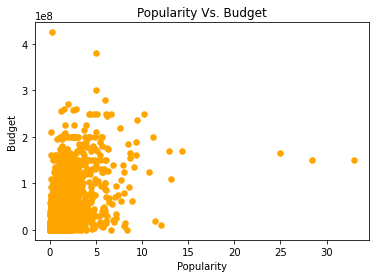

In [28]:
scatterplot(df['popularity'],df['budget'],'Popularity','Budget','Popularity Vs. Budget', 'Orange')
df[['popularity', 'budget']].corr()

Moderate positive relationship: Pearson r = 0.5

### What are the 5 most popular genres?

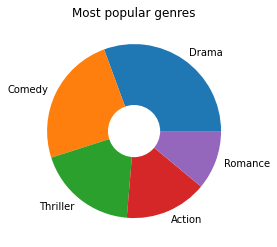

Drama       4746
Comedy      3775
Thriller    2902
Action      2376
Romance     1708
dtype: int64

In [29]:
genres_list = []
for x in range (df.shape[0]):
    Genre = str(df['genres'].iloc[x]).strip('[]').replace('|', ',').split(',')
    for item in Genre:
        genres_list.append(item)
    x +=1

pd.Series(genres_list).value_counts().nlargest(5).plot(kind = 'pie')
plt.title('Most popular genres')
plt.ylabel('')
centre_circle = plt.Circle((0, 0), 0.30, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()


pd.Series(genres_list).value_counts().nlargest(5)

Above is an donut chart showing the 5 most popular genre

### What are the 10 Highest grossing movies?

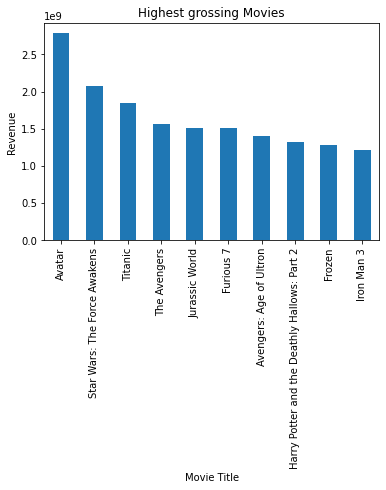

,movie_title,revenue
1386,Avatar,2781505847
3,Star Wars: The Force Awakens,2068178225
5231,Titanic,1845034188
4361,The Avengers,1519557910
0,Jurassic World,1513528810
4,Furious 7,1506249360
14,Avengers: Age of Ultron,1405035767
3374,Harry Potter and the Deathly Hallows: Part 2,1327817822
5422,Frozen,1274219009
5425,Iron Man 3,1215439994


In [30]:
#Highest grossing movies
df.groupby('movie_title').sum().revenue.nlargest(10).plot(kind='bar')
plt.title('Highest grossing Movies')
plt.xlabel('Movie Title')
plt.ylabel('Revenue')
plt.show()

df[['movie_title', 'revenue']].sort_values(by='revenue', ascending=False).head(10)

The bar chart above is showing the top 10 highest grossing movies

### Who are the most featured actors?

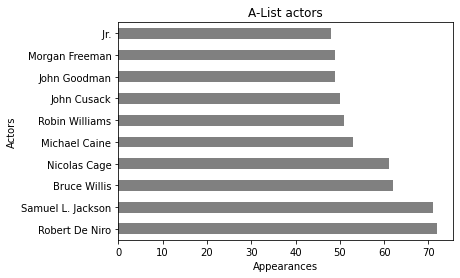

Robert De Niro       72
Samuel L. Jackson    71
Bruce Willis         62
Nicolas Cage         61
Michael Caine        53
Robin Williams       51
John Cusack          50
John Goodman         49
Morgan Freeman       49
 Jr.                 48
dtype: int64

In [31]:
#Leading actors
actors = []
for i in range (df.shape[0]):
    actor = str(df['cast'].iloc[i]).strip('[]').replace('|', ',').split(',')
    for item in actor:
        actors.append(item)
    i +=1
    
pd.Series(actors).value_counts().nlargest(10).plot(kind = 'barh', color='grey')
plt.title('A-List actors')
plt.ylabel('Actors')
plt.xlabel('Appearances')
plt.show()

pd.Series(actors).value_counts().nlargest(10)

The above is an horizontal bar chart showing most featured actors

### What are the 10 most profitable movies?

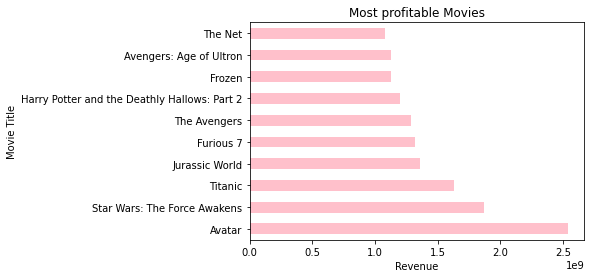

movie_title
Avatar                                          2544505847
Star Wars: The Force Awakens                    1868178225
Titanic                                         1632034188
Jurassic World                                  1363528810
Furious 7                                       1316249360
The Avengers                                    1288080742
Harry Potter and the Deathly Hallows: Part 2    1202817822
Frozen                                          1127284869
Avengers: Age of Ultron                         1125035767
The Net                                         1084279658
Name: profit, dtype: int64

In [32]:
#Most profitable movie
df.groupby('movie_title').sum().profit.nlargest(10).plot(kind='barh', color = 'pink')
plt.title('Most profitable Movies')
plt.ylabel('Movie Title')
plt.xlabel('Revenue')
plt.show()
df.groupby('movie_title').sum().profit.nlargest(10)

The horizontal bar chart above shows the 10 most profitable movies

### What is the sum of profit per year, most profitable year and the least profitable year?

In [33]:
profit_per_year = df.pivot_table(values = 'profit', index = 'release_year', aggfunc = "sum")
profit_per_year.head(56)

,profit
release_year,
1960,122948052
1961,291583188
1962,160857720
1963,114073489
1964,301498621
1965,387876739
1966,27181889
1967,637182637
1968,192793980


In [34]:
max_profit = df.groupby('release_year')['profit'].sum().idxmax()
min_profit = df.groupby('release_year')['profit'].sum().idxmin()
"The year with maximiun profit is {} while the year with the minimum profit is {}.".format(max_profit, min_profit)

'The year with maximiun profit is 2015 while the year with the minimum profit is 1966.'

The table above shows that the year with maximiun profit is 2015 while the year with the minimum profit is 1966.

### What is the average rating per director?

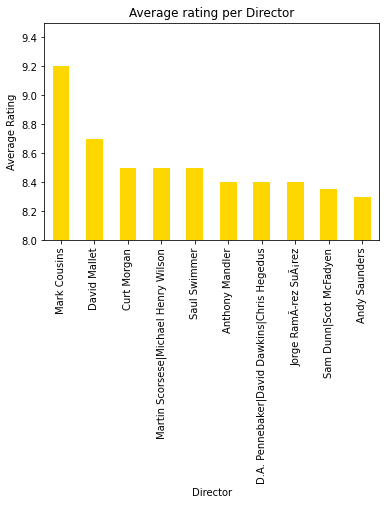

director
Mark Cousins                                  9.2
David Mallet                                  8.7
Curt Morgan                                   8.5
Martin Scorsese|Michael Henry Wilson          8.5
Saul Swimmer                                  8.5
Anthony Mandler                               8.4
D.A. Pennebaker|David Dawkins|Chris Hegedus   8.4
Jorge RamÃ­rez SuÃ¡rez                        8.4
Sam Dunn|Scot McFadyen                        8.4
Andy Saunders                                 8.3
Name: rating, dtype: float64

In [35]:
#average rating per director
df.groupby('director').mean().rating.nlargest(10).plot(kind='bar', color='gold')
plt.ylim(8, 9.5)
plt.title('Average rating per Director')
plt.xlabel('Director')
plt.ylabel('Average Rating')
plt.show()

df.groupby('director').mean().rating.nlargest(10)

The above viz shows the average rating per director

### What is the average rating per year?

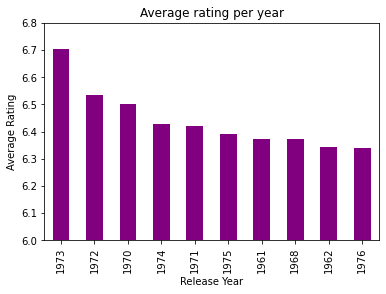

release_year
1973   6.7
1972   6.5
1970   6.5
1974   6.4
1971   6.4
1975   6.4
1961   6.4
1968   6.4
1962   6.3
1976   6.3
Name: rating, dtype: float64

In [36]:
#average rating per year
df.groupby('release_year').mean().rating.nlargest(10).plot(kind='bar', color='purple')
plt.ylim(6, 6.8)
plt.title('Average rating per year')
plt.xlabel('Release Year')
plt.ylabel('Average Rating')
plt.show()

df.groupby('release_year').mean().rating.nlargest(10)

The above viz shows the average rating per year

### What are the most popular movies?

In [37]:
df.groupby('movie_title').max().popularity.nlargest(10)

movie_title
Jurassic World                          33.0
Mad Max: Fury Road                      28.4
Interstellar                            24.9
Guardians of the Galaxy                 14.3
Insurgent                               13.1
Captain America: The Winter Soldier     13.0
Star Wars                               12.0
John Wick                               11.4
Star Wars: The Force Awakens            11.2
The Hunger Games: Mockingjay - Part 1   10.7
Name: popularity, dtype: float64

Listed above are the most popular movies

### What is the number of movies per year?

In [38]:
#movies per year
movies_per_year = df.pivot_table(values = 'movie_title', index = 'release_year', aggfunc = "count")
movies_per_year.head(56)

,movie_title
release_year,
1960,32
1961,31
1962,32
1963,34
1964,42
1965,35
1966,46
1967,38
1968,38


In [39]:
max_movies = df.groupby('release_year')['movie_title'].count().idxmax()
min_movies = df.groupby('release_year')['movie_title'].count().idxmin()
"The year with highest number of movies released is {} while the year with the lowest number movies released is {}.".format(max_movies, min_movies)

'The year with highest number of movies released is 2014 while the year with the lowest number movies released is 1969.'

Above shows that The year with highest number of movies released is 2014 while the year with the lowest number movies released is 1969.

<a id='conclusions'></a>
## Conclusions

1. The most popular genres are: Drama, Comedy, Thriller, Action and Romance
<br>
2. The highest grossing movies are as below;
Avatar -	2781505847
<br>
Star Wars: The Force Awakens-	2068178225
<br>
Titanic -	1845034188
<br>
The Avengers -	1519557910
<br>
Jurassic World -	1513528810
<br>
Furious 7 -	1506249360
<br>
Avengers: Age of Ultron	 -1405035767
<br>
Harry Potter and the Deathly Hallows: Part 2 -	1327817822
<br>
Frozen	- 1274219009
<br>
Iron Man 3	- 1215439994
<br>
3. The most featured casts are: Robert De Niro, Samuel L. Jackson, Bruce Willis, Nicolas Cage, Michael Caine, Robin Williams, John Cusack, Morgan Freeman, John Goodman and Liam Neeson
<br>
4.  The most profitable movies are;
<br>
    Avatar                        -                  2544505847
<br>
    Star Wars: The Force Awakens     -               1868178225
<br>
    Titanic                           -              1632034188
<br>
    Jurassic World                   -               1363528810
<br>
    Furious 7                        -               1316249360
<br>
    The Avengers                              -      1288080742
<br>
    Harry Potter and the Deathly Hallows: Part 2   - 1202817822
<br>
    Frozen                  -                        1127284869
<br>
    Avengers: Age of Ultron      -                   1125035767
<br>
    The Net              -                           1084279658
<br>
5. The year with maximiun profit is 2015 while the year with the minimum profit is 1966.
<br>
6. Average rating per director is as below;
<br>
    Mark Cousins      -                            9.2
<br>
    David Mallet     -                             8.7
<br>
    Curt Morgan         -                          8.5
<br>
    Martin Scorsese|Michael Henry Wilson    -      8.5
<br>
    Saul Swimmer                           -       8.5
<br>
    Anthony Mandler                 -              8.4
<br>
    D.A. Pennebaker|David Dawkins|Chris Hegedus  - 8.4
<br>
    Jorge RamÃ­rez SuÃ¡rez      -                  8.4
<br>
    Sam Dunn|Scot McFadyen     -                   8.4
<br>
    Andy Saunders             -                    8.3
<br>
7. Average rating per year is as below;
<br>
1973 -   6.7
<br>
1972 -  6.5
<br>
1970 -   6.5
<br>
1974 -  6.4
<br>
1971 -  6.4
<br>
1975 -  6.4
<br>
1961 - 6.4
<br>
1968 - 6.4
<br>
1962 - 6.3
<br>
1976 -  6.3
<br>
8. The most popular movies are; Jurassic World, Mad Max: Fury Road, Interstellar, Guardians of the Galaxy, Insurgent, Captain America: The Winter Soldier, Star Wars, John Wick, Star Wars: The Force Awakens and The Hunger Games: Mockingjay - Part 1.
<br>
9. The year with highest number of movies released is 2014 while the year with the lowest number movies released is 1969.
<br>

## Limitations

* The most featured casts don't have the highest ratings
* The highest grossing movie isn't the most profitable movie
* The most profitable movie isn't the most popular movie
* The year with the highest number of release didn't make highest profit

## Submitting your Project 

In [40]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1